# AI Tools Project

explaination

## Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale
%matplotlib inline

## Load The Data

In [3]:
df = pd.read_csv('data.csv')
df.shape

(169909, 19)

In [3]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

## Understand The Data

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [7]:
df.isna().sum()   

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## Univariate Analysis

### Acousticness

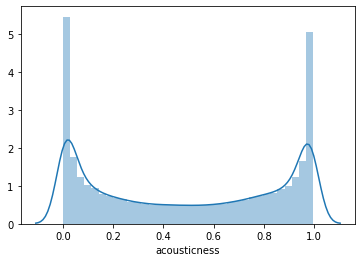

In [11]:
sns.distplot(df['acousticness'], kde=True)

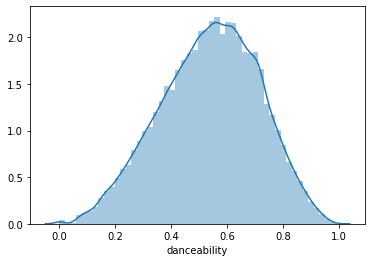

In [12]:
sns.distplot(df['danceability'], kde=True)

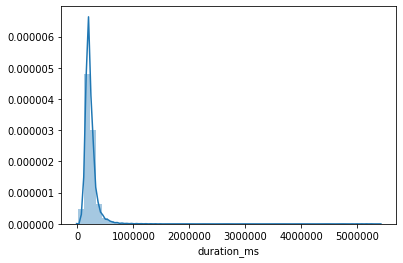

In [13]:
sns.distplot(df['duration_ms'], kde=True)

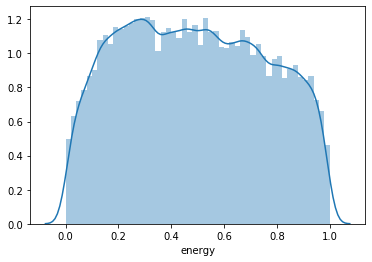

In [14]:
sns.distplot(df['energy'], kde=True)

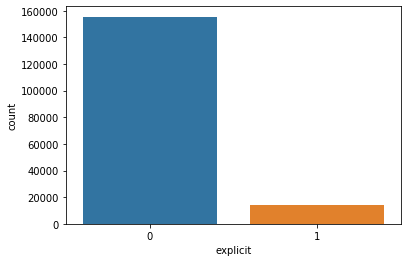

In [15]:
sns.countplot(df['explicit'])

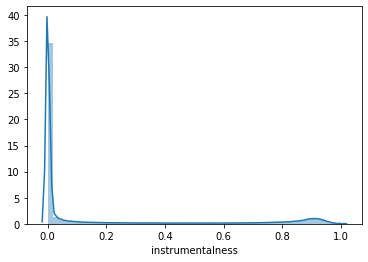

In [16]:
sns.distplot(df['instrumentalness'], kde=True)

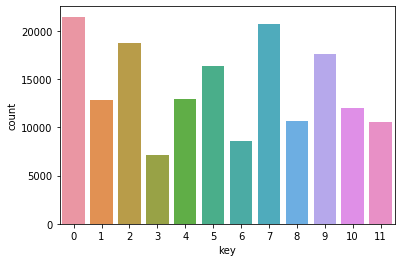

In [17]:
sns.countplot(df['key'])

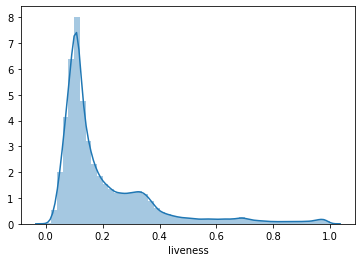

In [18]:
sns.distplot(df['liveness'], kde=True)

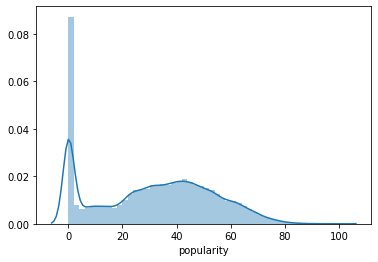

In [19]:
sns.distplot(df['popularity'], kde=True)

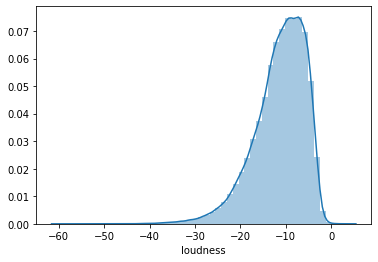

In [20]:
sns.distplot(df['loudness'], kde=True)

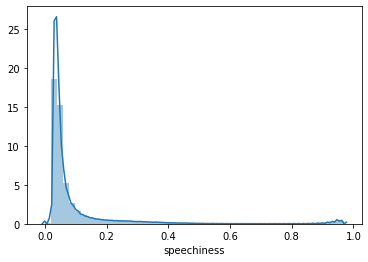

In [21]:
sns.distplot(df['speechiness'], kde=True)

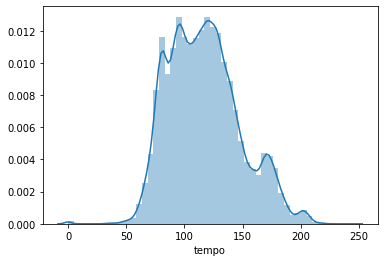

In [22]:
sns.distplot(df['tempo'], kde=True)

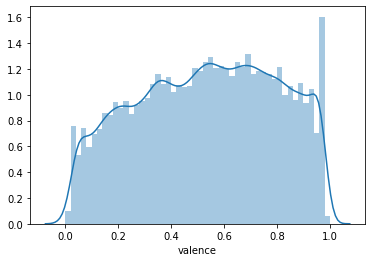

In [23]:
sns.distplot(df['valence'], kde=True)

## Check features that are important

In [8]:
cm = df.corr()
cm

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


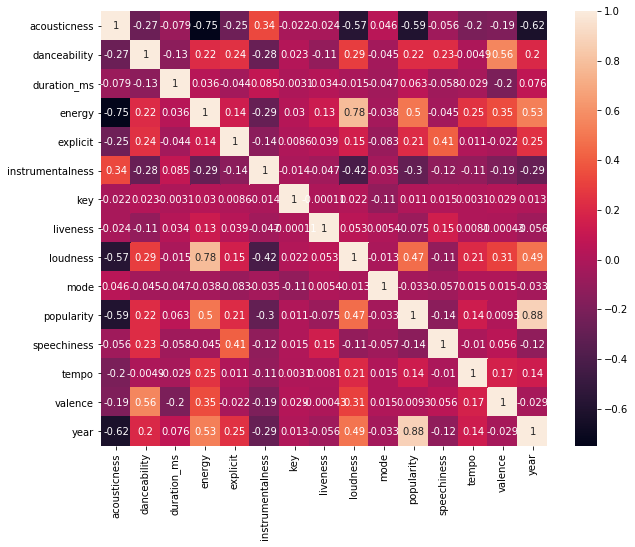

In [9]:
# Print correlation matrix to understand relationship between variables
matrix = df.corr()
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,8)

In [10]:
cm['popularity']

acousticness       -0.593345
danceability        0.221077
duration_ms         0.063292
energy              0.497488
explicit            0.214044
instrumentalness   -0.299829
key                 0.010675
liveness           -0.075293
loudness            0.466546
mode               -0.032854
popularity          1.000000
speechiness        -0.135707
tempo               0.135047
valence             0.009327
year                0.880724
Name: popularity, dtype: float64

## Bivariate Analysis

## Mini Cluster

In [24]:
dfp = pd.read_csv('data.csv')
dfp = dfp[['acousticness', 'popularity']]
dfp.head()

,acousticness,popularity
0,0.995,0
1,0.994,0
2,0.604,0
3,0.995,0
4,0.990,1


In [25]:
dfp['acousticness'] = scale(dfp['acousticness'])
dfp['popularity'] = scale(dfp['popularity'])
dfp.head()

,acousticness,popularity
0,1.332319,-1.462135
1,1.329664,-1.462135
2,0.294154,-1.462135
3,1.332319,-1.462135
4,1.319044,-1.415802


In [26]:
clusterNum = 10
k_means = KMeans(n_clusters = clusterNum, n_init = 10)
k_means.fit(dfp)
labels = k_means.labels_
print(labels)

[2 2 0 ... 7 3 3]


In [27]:
dfp["cluster"] = labels
dfp.head(5)

,acousticness,popularity,cluster
0,1.332319,-1.462135,2
1,1.329664,-1.462135,2
2,0.294154,-1.462135,0
3,1.332319,-1.462135,2
4,1.319044,-1.415802,2


In [28]:
dfp.groupby('cluster').mean()

,acousticness,popularity
cluster,,
0,-0.540055,-1.290376
1,-0.250291,0.727517
2,1.187947,-1.393337
3,-1.015114,1.544120
4,-1.159195,0.715695
5,0.904945,0.327034
6,0.926511,-0.614487
7,0.641714,1.306309
8,-1.076553,-0.047621


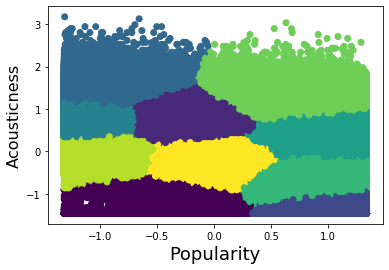

In [29]:
plt.scatter(dfp['acousticness'], dfp['popularity'], c=labels.astype(np.float))
plt.xlabel('Popularity', fontsize=18)
plt.ylabel('Acousticness', fontsize=16)
plt.show()

## Modelling

In [4]:
mdf = df[['acousticness','danceability','energy','instrumentalness','loudness', 'year', 'popularity']].copy()

In [5]:
mdf.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'year', 'popularity'],
      dtype='object')

In [6]:
for i in mdf.columns:
    mdf[i] = scale(mdf[i])
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [9]:
clusterNum = 100
k_means = KMeans(n_clusters = clusterNum, n_init = 1, max_iter=100)
k_means.fit(mdf)
labels = k_means.labels_
print(labels)

[34 63 13 ... 35 67  7]


In [10]:
df["cluster"] = labels
df.head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,34
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,63
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,13
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,74
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,6


In [11]:
df.groupby('cluster').mean()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
cluster,,,,,,,,,,,,,,,
0,0.951383,0.512232,188875.544182,0.244492,0.000311,0.025320,5.197262,0.232673,-12.026784,0.714686,1.653391,0.085871,111.127671,0.560166,1941.625700
1,0.740279,0.523723,222626.235866,0.273134,0.001767,0.015598,5.143993,0.164735,-13.857677,0.778269,53.428445,0.047094,114.636896,0.446457,1970.696996
2,0.969918,0.594318,185054.075182,0.139121,0.000730,0.867526,5.163504,0.140081,-20.389153,0.696350,3.512409,0.082174,108.276896,0.534906,1945.135766
3,0.094396,0.506058,249886.683883,0.692103,0.126007,0.008818,5.230403,0.206211,-6.597399,0.726007,46.687912,0.076792,126.376463,0.466723,2004.106960
4,0.265946,0.594571,247254.656250,0.482079,0.069712,0.009918,5.210737,0.171917,-9.395978,0.769231,45.755208,0.058961,118.069600,0.486496,2000.059295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.679527,0.539911,230722.011241,0.405364,0.018735,0.010452,5.266979,0.197028,-10.683892,0.800000,39.210304,0.060404,120.077292,0.496733,1994.243560
96,0.570560,0.495929,236518.311158,0.628090,0.113672,0.009158,5.140911,0.226767,-6.717721,0.734940,52.371399,0.099535,125.264412,0.504618,2005.716082
97,0.105647,0.830444,207071.724844,0.637654,0.640695,0.005035,5.269368,0.159931,-6.072154,0.562778,67.158504,0.159646,119.978750,0.564093,2015.142030


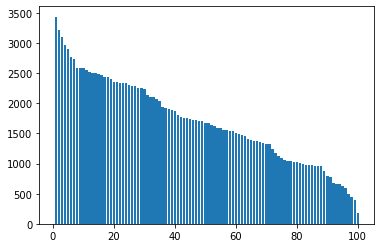

In [12]:
x = plt.bar([i for i in range(1, clusterNum+1)], df.cluster.value_counts())

In [13]:
df.to_csv('song_cluster.csv', index=False)